In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install top2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00


In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/content/drive/MyDrive/')
from dataclasses import dataclass
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Optional, Tuple, Union
import random
import numpy as np
import re
from top2vec import Top2Vec

In [4]:
ratings_df = pd.read_csv("/content/drive/MyDrive/Regenesys/ratings.csv")
captions_df = pd.read_csv("/content/drive/MyDrive/Regenesys/evaluation/evaluate_using_caption/captions_gpt4omini_realimg.csv")
ratings_df.drop(columns=["Unnamed: 0", "worker"], inplace=True)
liked_df = ratings_df[ratings_df["score"]>=4]
captions_df.drop(columns=["Unnamed: 0"], inplace=True)
liked_df = liked_df.merge(captions_df, left_on="imagePair", right_on="Image", how="inner").drop(columns=["imagePair"])
tmp = liked_df['Caption']
tmp.drop_duplicates(inplace=True)
texts = tmp.tolist()
print("Number of liked images",len(texts))

# train a topic model
model = Top2Vec(
    documents=texts,
    ngram_vocab=True,
    contextual_top2vec=True
)
topic_sizes, topic_nums = model.get_topic_sizes()
print("Topic sizes:", topic_sizes)
print("Topic numbers:", topic_nums)

topics_words, word_scores, topic_nums = model.get_topics()

for topic_idx, topic_num in enumerate(topic_nums):
    print(f"\nTopic #{topic_num} (Size: {topic_sizes[topic_idx]})")
    for word, score in zip(topics_words[topic_idx][:5], word_scores[topic_idx][:5]):
        print(f"  {word} (score: {score:.2f})")

doc_topic_distributions = model.get_document_topic_distribution()
num_docs, num_topics = doc_topic_distributions.shape
print("\nDoc-topic distribution shape:", doc_topic_distributions.shape)

2025-01-21 06:09:43,767 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Number of liked images 27499


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-01-21 06:09:45,031 - top2vec - INFO - Creating vocabulary embedding
INFO:top2vec:Creating vocabulary embedding
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Embedding vocabulary: 100%|██████████| 50/50 [00:08<00:00,  6.09it/s]
2025-01-21 06:09:59,665 - top2vec - INFO - Create contextualized document embeddings
INFO:top2vec:Create contextualized document embeddings
Embedding documents: 100%|██████████| 860/860 [02:27<00:00,  5.83it/s]
27499it [00:00, 68949.23it/s]
2025-01-21 06:12:45,166 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-01-21 06:13:22,511 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Topic sizes: [14591 13539 11896 10688  9681  8693  6385  6178  5930  5712  5698  5587
  5520  5461  5433  5357  5302  5242  5207  5120  5040  5003  4733  4714
  4601  4565  4502  4345  4342  4327  4264  4252  4126  4010  3990  3986
  3942  3912  3769  3618  3597  3443  3427  3379  3263  3252  3231  3185
  3177  3144  2921  2912  2902  2866  2815  2815  2812  2809  2722  2677
  2675  2675  2628  2507  2456  2441  2402  2397  2357  2303  2274  2229
  2195  2185  2130  2126  2071  1980  1978  1945  1925  1873  1831  1830
  1824  1806  1768  1732  1730  1721  1720  1689  1678  1661  1626  1590
  1583  1567  1560  1540  1516  1512  1507  1505  1493  1471  1456  1450
  1446  1438  1438  1425  1424  1408  1396  1337  1316  1306  1305  1252
  1223  1217  1201  1190  1184  1180  1173  1171  1163  1154  1152  1103
  1088  1071  1027  1025  1007  1000   999   961   915   906   901   889
   877   851   823   816   787   781   761   750   739   737   732   722
   716   710   706   687   687   687  

In [27]:
topics_words[0]

array(['celebrating graduation', 'graduation ceremony', 'graduation day',
       'graduates celebrating', 'proud graduate',
       'celebrating achievements', 'graduate receives',
       'celebrating special', 'celebrating victory',
       'cultural celebration', 'celebrating love', 'her diploma',
       'wedding celebration', 'birthday celebration',
       'proudly displaying', 'lively parade', 'holiday cheer',
       'joyful wedding', 'lively gathering', 'passionate performer',
       'speaker presents', 'during presentation', 'stands proudly',
       'speaker presenting', 'to celebrate', 'dancers showcase',
       'celebrate special', 'wedding ceremony', 'celebrate their',
       'performer passionately', 'standing proudly', 'their wedding',
       'performing passionately', 'enthusiastic crowd', 'birthday party',
       'welcoming entrance', 'friends enjoying', 'smiling warmly',
       'fans cheer', 'proud moment', 'cheering crowd', 'special occasion',
       'passionately performi

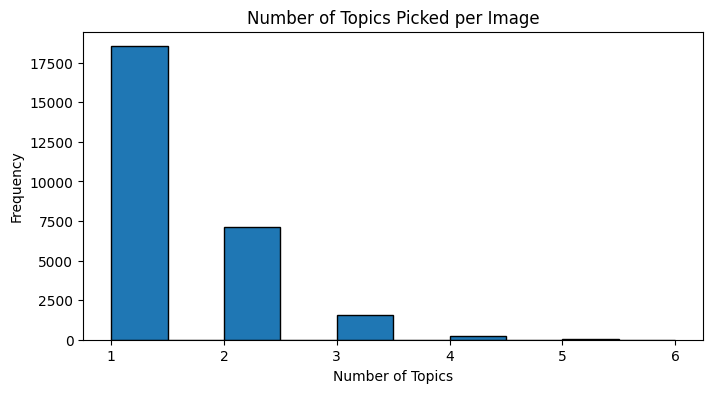

In [21]:
def get_top_topic_keywords(topic_id, top_k=5):
    return topics_words[topic_id][:top_k]

def pick_topics_with_threshold(probs: np.ndarray, alpha: float) -> (List[int], List[float]):
    # Sort topic indices by probability descending
    sorted_idx = np.argsort(-probs)
    sorted_probs = probs[sorted_idx]
    picked_topic_ids = []
    picked_topic_probs = []
    cum_sum = 0.0

    for i, p in zip(sorted_idx, sorted_probs):
        picked_topic_ids.append(i)
        picked_topic_probs.append(p)
        cum_sum += p
        if cum_sum >= alpha:
            break

    return picked_topic_ids, picked_topic_probs


alpha = 0.9
picked_topics_per_doc = []
picked_probs_per_doc = []
num_picked_per_doc = []

for i in range(num_docs):
    probs = doc_topic_distributions[i]
    topic_ids, topic_probs = pick_topics_with_threshold(probs, alpha=alpha)

    picked_topics_per_doc.append(topic_ids)
    picked_probs_per_doc.append(topic_probs)
    num_picked_per_doc.append(len(topic_ids))

doc_topic_df = pd.DataFrame({
    "image_idx": range(num_docs),
    "caption": texts,
    "picked_topics": picked_topics_per_doc,
    "picked_probs": picked_probs_per_doc,
    "num_picked_topics": num_picked_per_doc
})

# Count picked topics
plt.figure(figsize=(8,4))
plt.hist(doc_topic_df["num_picked_topics"], edgecolor='black')
plt.title("Number of Topics Picked per Image")
plt.xlabel("Number of Topics")
plt.ylabel("Frequency")
plt.show()

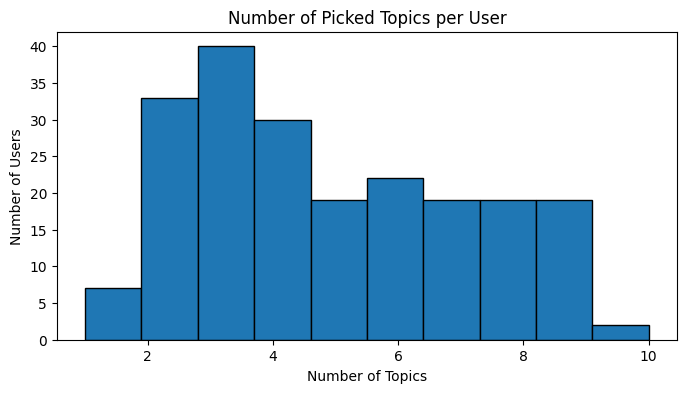

In [59]:
liked_df_topics = liked_df.merge(
    doc_topic_df[["caption", "picked_topics", "picked_probs"]],
    left_on="Caption",
    right_on="caption",
    how="left"
).drop(columns=["Caption"])


# Compute topic distributions over users
user_ids = liked_df_topics["worker_id"].unique()
user_topic_sums = {u: np.zeros(num_topics) for u in user_ids}

for row in liked_df_topics.itertuples(index=False):
    worker_id = getattr(row, "worker_id")
    for t_id, t_prob in zip(row.picked_topics, row.picked_probs):
        user_topic_sums[worker_id][t_id] += t_prob

for user_id in user_ids:
    user_topic_sums[user_id] = user_topic_sums[user_id] / user_topic_sums[user_id].sum()

# pick topics for each user based on the topic distribution
alpha_usr = 0.2
user_num_picked_topics = []
rows = []
for user_id in user_ids:
    user_probs = user_topic_sums[user_id]
    # pick from high to low until sum >= alpha
    picked_ids, picked_probs = pick_topics_with_threshold(user_probs, alpha=alpha_usr)
    user_num_picked_topics.append(len(picked_ids))
    # print(f"\nUser: {user_id} | Summed Topic Distribution Picks (alpha={alpha})")
    # for t_id, p in zip(picked_ids, picked_probs):
    #     top_keywords = get_top_topic_keywords(t_id, top_k=5)
    #     print(f"  Topic {t_id} with prob sum {p:.3f}, top words={top_keywords}")
    for t_id, t_prob in zip(picked_ids, picked_probs):
        rows.append({
            "user_id": user_id,
            "topic_id": t_id,
            "topic_prob": t_prob,
            "topic_keywords": get_top_topic_keywords(t_id, top_k=5)
        })

user_topic_df = pd.DataFrame(rows)

plt.figure(figsize=(8,4))
plt.hist(user_num_picked_topics, edgecolor='black')
plt.title("Number of Picked Topics per User")
plt.xlabel("Number of Topics")
plt.ylabel("Number of Users")
plt.show()

We can see a certain portion of users pick many topics. A possible reason is that they liked many images

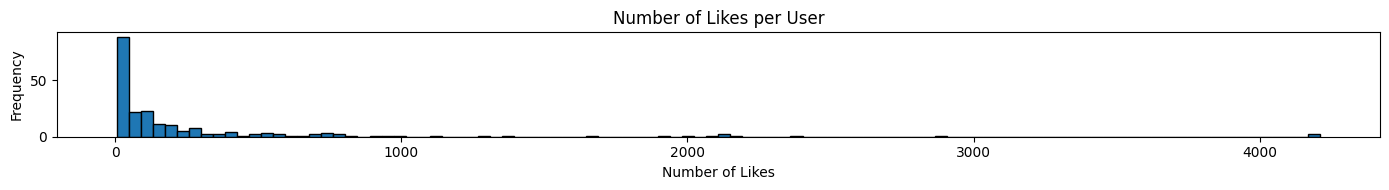

In [56]:
user_like_counts = (
    liked_df.groupby("worker_id")
    .size()
    .reset_index(name="likes_count")
)

user_like_counts = user_like_counts.sort_values("likes_count", ascending=True)
plt.figure(figsize=(14, 2))
plt.hist(user_like_counts["likes_count"], bins=100, edgecolor='black')
# plt.xscale("log")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.title("Number of Likes per User")
plt.tight_layout()
plt.show()


In [62]:
user_topic_df.to_csv("/content/drive/MyDrive/Regenesys/evaluation/evaluate_using_caption/user_topics.csv", index=False)

In [65]:
topic_list = []
for i, topic_num in enumerate(topic_nums):
    topic_list.append({
        "topic_num": topic_num,
        "topic_size": topic_sizes[i],
        "topic_keywords": topics_words[i],
        "word_scores": word_scores[i],
    })

topics_df = pd.DataFrame(topic_list)
topics_df.to_csv("/content/drive/MyDrive/Regenesys/evaluation/evaluate_using_caption/topics.csv", index=False)